<a href="https://colab.research.google.com/github/Raghava2004-cpu/Logistic-Regression-Projects/blob/main/Sentimental_analysis_onSpotifyReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/spotify_reviews.csv')
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,437314fe-1b1d-4352-abea-12fec30fce58,Rajib Das,It's good,4,0,NaN,2024-05-09 16:28:13,NaN
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494


In [21]:
data.drop(columns = ['reviewId' , 'userName' , 'thumbsUpCount' , 'reviewCreatedVersion', 'at','appVersion'] , inplace = True)

In [22]:
data.head()

,content,score
0,It's good,4
1,"I love this app so much, I've been using Spoti...",5
2,Perfect,5
3,Best all around music streaming app I have use...,5
4,Are y'all fr gatekeeping the play button on so...,1


In [23]:
data['score'] = data['score'].apply(lambda x : 1 if x >= 3  else 0 )

In [24]:
data.head()

,content,score
0,It's good,1
1,"I love this app so much, I've been using Spoti...",1
2,Perfect,1
3,Best all around music streaming app I have use...,1
4,Are y'all fr gatekeeping the play button on so...,0


<Axes: xlabel='score', ylabel='count'>

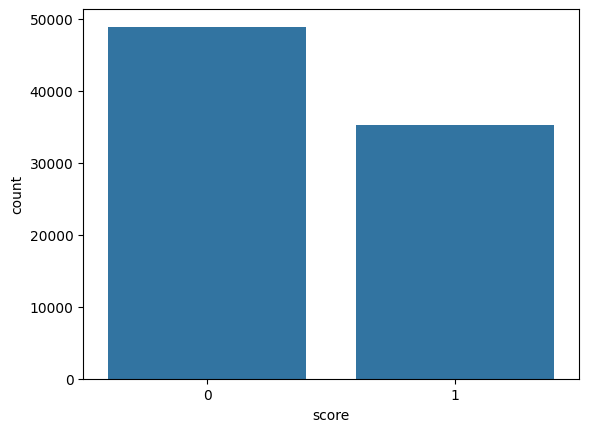

In [25]:
sns.countplot(x = 'score' , data = data)

In [26]:
data.shape

(84165, 2)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84165 entries, 0 to 84164
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  84165 non-null  object
 1   score    84165 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [28]:
import re
def clean_text(text):
  text = re.sub(r'\s+' , ' ' , text)
  text = re.sub(r'^\w\s' , '' , text)
  text = text.lower().strip()
  return text

In [29]:
data['content'] = data['content'].apply(clean_text)

In [31]:
data['content'].head()

,content
0,it's good
1,"love this app so much, i've been using spotify..."
2,perfect
3,best all around music streaming app i have use...
4,are y'all fr gatekeeping the play button on so...


In [36]:
from sklearn.model_selection import KFold , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import *

x = data['content']
y = data['score']

kf = KFold(n_splits = 10 , shuffle = True , random_state = 42 )
best_accuracy = 0
best_fold_data = None

model = LogisticRegression(solver = 'sag' , max_iter = 30000)

for fold , (train_index , test_index) in enumerate(kf.split(x)):
  x_train , x_test = x.iloc[train_index] , x.iloc[test_index]
  y_train , y_test = y.iloc[train_index]  , y.iloc[test_index]

  vector = TfidfVectorizer()
  x_train_vec = vector.fit_transform(x_train)
  x_test_vec = vector.transform(x_test)

  model.fit(x_train_vec , y_train)

  predicted  = model.predict(x_test_vec)
  accuracy = accuracy_score(y_test , predicted)

  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_fold_data = (x_train , x_test , y_train , y_test)
  print(f"Accuracy Score {fold+1} : {accuracy*100}")

print(f"Best Accuracy Score : {best_accuracy*100}")
if best_fold_data:
  (x_train , x_test , y_train , y_test) = best_fold_data


Accuracy Score 1 : 82.2739693477486
Accuracy Score 2 : 82.0244742782464
Accuracy Score 3 : 82.66603302839492
Accuracy Score 4 : 81.91754781988833
Accuracy Score 5 : 81.82250207912558
Accuracy Score 6 : 82.29562737642586
Accuracy Score 7 : 81.57081749049429
Accuracy Score 8 : 81.1430608365019
Accuracy Score 9 : 81.9272813688213
Accuracy Score 10 : 82.12927756653993
Best Accuracy Score : 82.66603302839492


In [66]:
model = LogisticRegression( max_iter = 300)

vector = TfidfVectorizer()
x_train_vec = vector.fit_transform(x_train)
x_test_vec = vector.transform(x_test)
model.fit(x_train_vec , y_train)
predicted  = model.predict(x_test_vec)
accuracy = accuracy_score(y_test , predicted)

In [67]:
print(f"Accuracy Score : {accuracy*100}")
print(f"Recall Score : {recall_score(y_test , predicted)*100}")
print(f'Precision Score : {precision_score(y_test , predicted)*100}')
print(f"Roc Auc Score : {roc_auc_score(y_test , predicted)*100}")

Accuracy Score : 82.70167518118095
Recall Score : 73.37923121055651
Precision Score : 82.89047310434219
Roc Auc Score : 81.3357320116867


In [71]:
def predict_review(text):
  text = clean_text(text)
  text = vector.transform([text])
  predict = model.predict(text)[0]
  return predict

In [74]:
review = 'I hate this app'
ans = (predict_review(review))
if ans == 1 :
  print('Positive')
else :
  print('Negative')

Negative
